In [56]:
%matplotlib inline

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [57]:
attacks_df = pd.read_csv("labelled_2021may-ip-10-100-1-26-dns.csv")

columns_to_remove = ["Timestamp", "DnsQuery", "DnsAnswer", "DnsAnswerTTL", "DnsQueryNames", "DnsQueryClass", "DnsQueryType", "NumberOfAnswers", "DnsResponseCode", "DnsOpCode", "SensorId", "sus", "evil"]
attacks_df = attacks_df.drop(columns=columns_to_remove)

print(attacks_df.head())

       SourceIP DestinationIP
0   10.100.1.95    10.100.0.2
1    10.100.0.2   10.100.1.95
2   10.100.1.95    10.100.0.2
3    10.100.0.2   10.100.1.95
4  10.100.1.186    10.100.0.2


In [58]:
g = nx.DiGraph()

for ip in attacks_df["SourceIP"]:
    g.add_node(ip)

for ip in attacks_df["DestinationIP"]:
    g.add_node(ip)

for source, dest in zip(attacks_df["SourceIP"], attacks_df["DestinationIP"]):
    wgt = g.get_edge_data(source, dest, default = {"weight":0})["weight"]

    g.add_edge(source, dest, weight = wgt+1)

for source, dest, data in g.edges(data=True):
    print(f"Edge: {source}-{dest}, Weight: {data['weight']}")

Edge: 10.100.1.95-10.100.0.2, Weight: 36
Edge: 10.100.0.2-10.100.1.95, Weight: 36
Edge: 10.100.0.2-10.100.1.186, Weight: 22
Edge: 10.100.0.2-10.100.1.105, Weight: 24
Edge: 10.100.0.2-10.100.1.26, Weight: 23
Edge: 10.100.0.2-10.100.1.4, Weight: 25
Edge: 10.100.1.186-10.100.0.2, Weight: 22
Edge: 10.100.1.105-10.100.0.2, Weight: 24
Edge: 10.100.1.26-10.100.0.2, Weight: 23
Edge: 10.100.1.4-10.100.0.2, Weight: 25
Edge: 141.212.123.189-10.100.1.26, Weight: 1
Edge: 141.212.123.193-10.100.1.186, Weight: 1
Edge: 74.120.14.31-10.100.1.4, Weight: 1
Edge: 209.17.97.122-10.100.1.186, Weight: 1
Edge: 209.17.96.42-10.100.1.26, Weight: 1
Edge: 209.17.97.58-10.100.1.4, Weight: 1
Edge: 185.232.64.121-10.100.1.186, Weight: 1
Edge: 192.35.168.27-10.100.1.26, Weight: 1
Edge: 129.250.206.86-10.100.1.95, Weight: 1


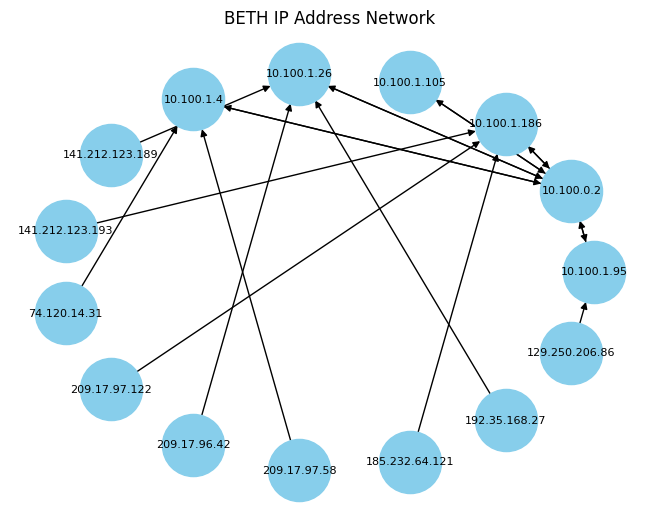

In [59]:
nx.draw(g, nx.circular_layout(g), with_labels=True, node_color='skyblue', node_size=2000, font_size=8)

plt.title("BETH IP Address Network")

plt.show()